In [8]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import cv2


print(sitk.Version())
from myshow import myshow
# Download data to work on
%run update_path_to_download_script
#from downloaddata import fetch_data as fdata

OUTPUT_DIR = "Output"

SimpleITK Version: 1.2.4 (ITK 4.13)
Compiled: Nov 13 2019 06:56:15



!!!Function Defs!!!

In [9]:
class patientExam:
    def __init__(self):
        self.loc = []
        self.c13 = []
        self.b0mag = []
        self.b0phase = []
        


def ITKImage2int2Gray(im):
    im = sitk.GetArrayFromImage(im)
    im = np.squeeze(im)
    im = np.uint8(255 * (im / im.max()))
    im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
    return im

def horosPath(num):
    outStr =  '/Users/galenreed/Documents/Horos Data/DATABASE.noindex/10000/' + str(num) + '.dcm'
    return outStr 


     
drawing=False # true if mouse is pressed
mode=True # if True, draw rectangle. Press 'm' to toggle to curve
def drawROI(im):
    
    listOfAllPoints = []


    # mouse callback function
    def begueradj_draw(event,former_x,former_y,flags,param):
        global current_former_x,current_former_y,drawing, mode

        if event==cv2.EVENT_LBUTTONDOWN:
            drawing=True
            current_former_x,current_former_y=former_x,former_y

        elif event==cv2.EVENT_MOUSEMOVE:
            if drawing==True:
                if mode==True:
                    cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),(0,0,255),5)
                    current_former_x = former_x
                    current_former_y = former_y
                    #print(former_x,former_y) 
                    listOfAllPoints.append([current_former_x, current_former_y])
        elif event==cv2.EVENT_LBUTTONUP:
            drawing=False
            if mode == True:
                cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),(0,0,255),5)
                current_former_x = former_x
                current_former_y = former_y
        return former_x,former_y    



    #im = cv2.imread('../DATA/sammy_face.jpg')
    cv2.namedWindow("Bill BEGUERADJ OpenCV")
    cv2.setMouseCallback('Bill BEGUERADJ OpenCV',begueradj_draw)
    while(1):
        cv2.imshow('Bill BEGUERADJ OpenCV',im)
        k=cv2.waitKey(1)&0xFF
        if k==27:
            break
    cv2.destroyAllWindows()
    cv2.waitKey(1)

    return(listOfAllPoints)
    
# take the list of coordinates, create an image with lines between points "roiImage"
def pointCoords2ROIImage(pointCoords, img): 
    roiImage = np.zeros((img.shape[0], img.shape[1]),dtype=np.uint8)
    counter = 0
    lastPixel = (0,0)
    for pixel in pointCoords:
        if counter == 0:
            lastPixel = pixel
            counter = counter +1
            continue
        else:
            cv2.line(roiImage,(lastPixel[0],lastPixel[1]), (pixel[0],pixel[1]),255,5)
            lastPixel = pixel
            counter = counter +1
    return roiImage   

# take ROI image, and 'close' this using the contour function. basically acts as paint bucket tool
def closeContours(roiImage):
    image, contours, hierarchy = cv2.findContours(roiImage, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    externalContours = np.zeros(roiImage.shape)
    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:#external contour
            cv2.drawContours(externalContours, contours, i, 255, -1)
    
    return externalContours

In [62]:
P20200721L = patientExam()
P20200721L.loc = horosPath(7370)
P20200721L.c13 = horosPath(7412)
P20200721L.b0phase = horosPath(7397)
P20200721L.b0mag = horosPath(7419)
P20200721L.mask = 'masks/P2020_0721_long.png'


P20200721S = patientExam()
P20200721S.loc = horosPath(7370)
P20200721S.c13 = horosPath(7396)
P20200721S.b0phase = horosPath(7397)
P20200721S.b0mag = horosPath(7419)
P20200721S.mask = 'masks/P2020_0721_long.png'


P20200715L = patientExam()
P20200715L.loc = horosPath(7086)
P20200715L.c13 = horosPath(7240)
P20200715L.b0phase = horosPath(7062)
P20200715L.b0mag  = horosPath(7043)
P20200715L.mask = ('masks/P2020_0715.png')

P20200715S = patientExam()
P20200715S.loc = horosPath(7086)
P20200715S.c13 = horosPath(7054)
P20200715S.b0phase = horosPath(7062)
P20200715S.b0mag  = horosPath(7043)
P20200715S.mask = ('masks/P2020_0715.png')


# low bicarb, repeated twice and slightly higher the second time. 
P20200123S = patientExam()
P20200123S.loc = horosPath(3566)
P20200123S.c13 = horosPath(3520)
P20200123S.b0mag = horosPath(3539)
P20200123S.b0phase = horosPath(3543)
P20200123S.mask = 'masks/P2020_0123.png'


#12/06 no bicarbonate, 2 subjects 

P20191120S = patientExam()
P20191120S.loc = horosPath(791)
P20191120S.c13 = horosPath(1240)
P20191120S.b0mag = horosPath(904)
P20191120S.b0phase = horosPath(815)
P20191120S.mask = 'masks/P2019_1120.png'


# hashoian coil 
P20191031 = patientExam()
P20191031.loc = horosPath(223)
P20191031.c13 = horosPath(341)
P20191031.b0mag = horosPath(294)
P20191031.b0phase = horosPath(305)
P20191031.mask = 'masks/P2019_1031.png'

# pulseteq coil
P20191031L = patientExam()
P20191031L.loc = horosPath(148)
P20191031L.c13 = horosPath(6665)
P20191031L.b0mag = horosPath(22)
P20191031L.b0phase = horosPath(81)
P20191031L.mask = 'masks/P2019_1031_pulseteq.png'


In [57]:

#read a test file, make sure shit worked
testFile = sitk.ReadImage(P20191031L.loc)

myshow(testFile)

interactive(children=(IntSlider(value=0, description='z', max=0), Output()), _dom_classes=('widget-interact',)…

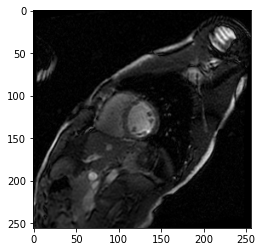

In [58]:
im = ITKImage2int2Gray(testFile)
plt.imshow(im)



In [59]:

listOfAllPoints = drawROI(im)
roiImage = pointCoords2ROIImage(listOfAllPoints, im)
closedROI = closeContours(roiImage)

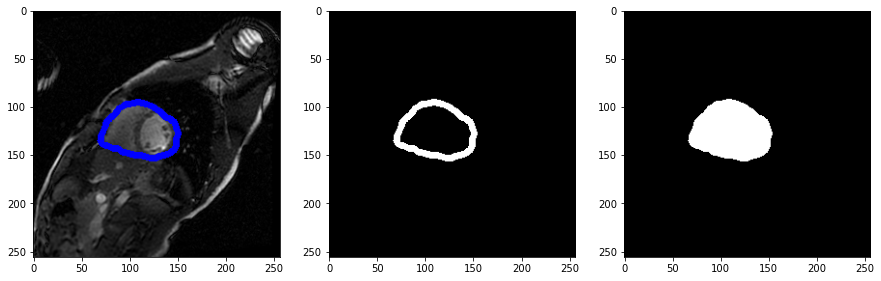

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(im)
ax2.imshow(roiImage)
ax3.imshow(closedROI)



In [61]:
cv2.imwrite('masks/P2019_1031_pulseteq.png', np.uint8(closedROI))

True

In [80]:
closedROI.max()

255.0